### Python Programming for Data Science: Review

* names
* numbers
* expressions
* strings
* comparisons
* sequences / lists / arrays
* tables
* visualizations
* functions

Below are several sets of tasks, each with individual questions. Answer each question in the cell that follows. Some will be code and some will be markdown. You can make additional cells, if needed. 

In [2]:
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'Sepal width')

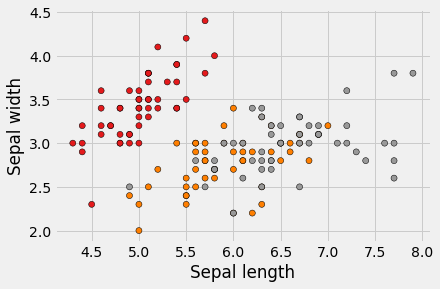

In [5]:
X_l, X_r = zip(*X)

plots.scatter(X_l, X_r, c=y, cmap=plots.cm.Set1,
            edgecolor='k')
plots.xlabel('Sepal length')
plots.ylabel('Sepal width')

### Task 1: Tables

You can refer to the documentation found at http://data8.org/datascience/tables.html for this task.

* Make a Table called `iris_table` with columns "label", "sepal_length" and "sepal_width" and fill the rows with the approprioate information from the above variables (i.e., names)

In [6]:
iris_table = Table().with_columns("label", y, "sepal_length", X_l, "spepal_width", X_r)
#iris_table

iris_table.stats()

statistic,label,sepal_length,spepal_width
min,0,4.3,2
max,2,7.9,4.4
median,1,5.8,3
sum,150,876.5,458.6


* print out the table's number of rows and number of columns

In [10]:
iris_table.num_rows, iris_table.num_columns

(150, 3)

* print out the `sepal_length` column

In [14]:
iris_table.select("sepal_length") # .column("sepal_length") #.where()

sepal_length
5.1
4.9
4.7
4.6
5
5.4
4.6
5
4.4
4.9


* print out the count of rows for each label type (this should result in three rows)

In [47]:
iris_table.group('label').show()

label,count
0,50
1,50
2,50


* write a function called `extend` that takes two variables: `x` and `y`. Return `[x] * y`

In [25]:
def extend(x,y=50):
    return [x] * y

In [26]:
# test your function by calling it. What happens?
extend('boise', 5)

['boise', 'boise', 'boise', 'boise', 'boise']

* make a new column called `label_name` where the rows correspond to the real names of the labels. Use your function above:
  * 0 = setosa
  * 1 = versicolor
  * 2 = virginica

In [27]:
new_col = extend('setosa') + extend('versicolor')  + extend('virginica')
# new_col = extend('setosa', 50) + extend('versicolor', 50)  + extend('virginica', 50)
new_col
iris_table.with_column('label_name', new_col)  # with_column doesn't change original table, but only display
iris_table 
iris_table.append_column('label_name', new_col) # append_column applies to original table
iris_table

label,sepal_length,spepal_width,label_name,label_name2
0,5.1,3.5,setosa,setosa
0,4.9,3,setosa,setosa
0,4.7,3.2,setosa,setosa
0,4.6,3.1,setosa,setosa
0,5,3.6,setosa,setosa
0,5.4,3.9,setosa,setosa
0,4.6,3.4,setosa,setosa
0,5,3.4,setosa,setosa
0,4.4,2.9,setosa,setosa
0,4.9,3.1,setosa,setosa


There's another way to make that column using `apply`. 

* First, write a function called `rename` that takes a variable `x`. Then use `if` statements to determine the value of x and return the approrpriate label name. For example:

```
if x == 0:
    return 'setosa'
```

In [17]:
def rename(x):
     if x==0: return 'setosa'
     if x==1: return 'versicolor'
     if x==2: return 'virginica'
        
# iris_table.with_column("label_name", iris_table.column("label").apply(rename()))
# error: 'numpy.ndarray' object has no attribute 'apply'


* Now, using your function, create a new column called 'label_name2' using `apply`

In [28]:
iris_table.append_column("label_name2", iris_table.apply(rename, "label")) # iris_table.append_column
# note: don't use apply(rename(),"")

label,sepal_length,spepal_width,label_name,label_name2
0,5.1,3.5,setosa,setosa
0,4.9,3,setosa,setosa
0,4.7,3.2,setosa,setosa
0,4.6,3.1,setosa,setosa
0,5,3.6,setosa,setosa
0,5.4,3.9,setosa,setosa
0,4.6,3.4,setosa,setosa
0,5,3.4,setosa,setosa
0,4.4,2.9,setosa,setosa
0,4.9,3.1,setosa,setosa


In [24]:
# print out the table
iris_table

label,sepal_length,spepal_width,label_name,label_name2
0,5.1,3.5,setosa,setosa
0,4.9,3,setosa,setosa
0,4.7,3.2,setosa,setosa
0,4.6,3.1,setosa,setosa
0,5,3.6,setosa,setosa
0,5.4,3.9,setosa,setosa
0,4.6,3.4,setosa,setosa
0,5,3.4,setosa,setosa
0,4.4,2.9,setosa,setosa
0,4.9,3.1,setosa,setosa


Did you notice that all of your functions used `50` as the second variable? 

* Rewrite the `extend` function so that y is 50 by default and rework your cell above to make use of this function change

## Task 2: Visualizations

* using the built-in Table visualizations, recreate the scatter plot that we made above. Try to somehow label which type of flower each dot belongs to.

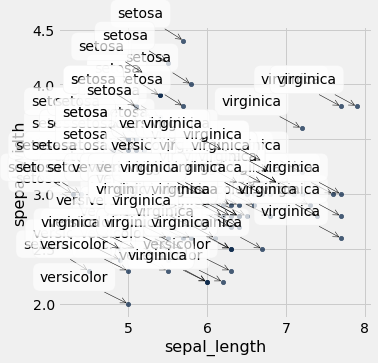

In [39]:
iris_table.scatter('sepal_length', 'spepal_width', labels='label_name', s=20) # s=20
#plots.xlabel('Sepal length')
#plots.ylabel('Sepal width')

* create a histogram

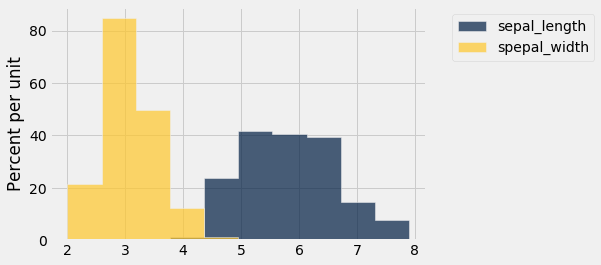

In [41]:
iris_table.hist('sepal_length', 'spepal_width') # s=20

* now, make a histogram for each label (hint: look at http://data8.org/datascience/_autosummary/datascience.tables.Table.where.html#datascience.tables.Table.where)

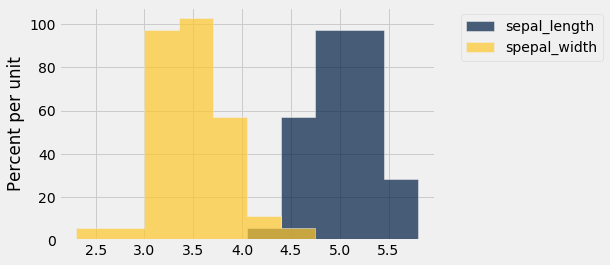

In [49]:
iris_table.where("label", 0).hist('sepal_length', 'spepal_width')
iris_table.where("label", 1).hist('sepal_length', 'spepal_width')
iris_table.where("label", 2).hist('sepal_length', 'spepal_width')

* Which plots are more useful, the scatter plot or the histogram? 

* print the table stats. Then print the stats for each label type. 

In [12]:
iris_table.stats()
iris_table.where("label", 0).stats()
iris_table.where("label", 1).stats()
iris_table.where("label", 2).stats()

statistic,label,sepal_length,spepal_width
min,2,4.9,2.2
max,2,7.9,3.8
median,2,6.5,3
sum,100,329.4,148.7


* What do you notice about the different types?